In [2]:
# this file deals with combined data (all numeric and some features from the text data like word count, avg word length 
# and sentiment score )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier  



from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score


In [3]:
df_numeric = pd.read_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\2_numeric_data.csv')
df_text = pd.read_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\4a-after-text-cleaning.csv')

In [4]:
df_numeric.columns

Index(['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'job_status', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num', 'location_num'],
      dtype='object')

In [5]:
df_text.columns

Index(['feedback', 'job_status', 'feedback_word_count', 'avg_word_len',
       'sentiment_score'],
      dtype='object')

In [6]:
# stack the DataFrames on top of each other/ Merge datasets row -wise 
df1 = df_numeric
df2 = df_text[[ 'feedback_word_count', 'avg_word_len', 'sentiment_score' ]]

# concat column wise so axis would 1
df = pd.concat([df1, df2], axis=1)
df.shape

(67528, 22)

In [8]:
df.to_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\5a-combined_sentiment_score_and_numeric.csv' , index=False)

In [14]:
df.columns

Index(['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'job_status', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num', 'location_num',
       'feedback_word_count', 'avg_word_len', 'sentiment_score'],
      dtype='object')

In [15]:
df.tail(5)

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,job_status,post_day,post_month,...,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num,feedback_word_count,avg_word_len,sentiment_score
67523,3.0,3.0,2.5,4.0,4.0,2.0,0,1,16,12,...,0,0,0,1,0,0.399864,0.371476,83,5.542169,1
67524,3.0,1.5,2.5,2.5,4.0,2.5,0,0,16,12,...,0,0,0,1,0,0.001718,0.371476,115,4.252174,1
67525,4.0,3.0,2.5,4.0,4.5,3.5,0,0,15,12,...,0,0,0,1,0,0.003909,0.371476,22,5.227273,1
67526,3.0,2.0,2.5,3.0,3.5,3.0,0,0,15,12,...,0,0,0,1,0,0.000118,0.371476,28,5.392857,-1
67527,2.0,2.0,2.5,2.0,4.0,2.0,0,1,14,12,...,0,0,0,1,0,0.001051,0.371476,50,5.140000,1


In [27]:
X = df[['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num', 'location_num',
       'feedback_word_count', 'avg_word_len', 'sentiment_score']]

y = df[['job_status']]

In [65]:
# building and running the model
kmeans_cluster_2 = KMeans(n_clusters=2 , random_state=5)
kmeans_cluster_3 = KMeans(n_clusters=2 , random_state=5)
kmeans_cluster_4 = KMeans(n_clusters=2 , random_state=5)

X = df
kmeans_cluster_2.fit(X)
kmeans_cluster_3.fit(X)
kmeans_cluster_4.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [76]:
kmeans_cluster_2_df = pd.DataFrame(kmeans_cluster_2.labels_)


SyntaxError: invalid syntax (<ipython-input-76-4fe3f0caaaca>, line 2)

Text(0.5,1,'feedback_word_count vs sentiment_score')

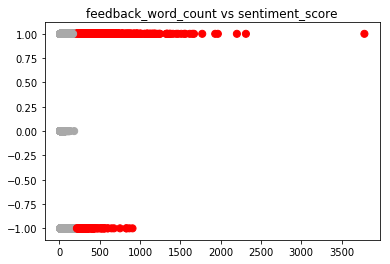

In [58]:
color_theme = np.array([ 'darkgray' , 'red' , 'blue' ])


plt.scatter(x= X['feedback_word_count'], y = X['sentiment_score'], c = color_theme[cluster_kmeans.labels_], s=50)
plt.title('feedback_word_count vs sentiment_score')




In [77]:
cluster_kmeans.labels_

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# save cluster kmeans model with 2 clusters


Text(0.5,1,'feedback_word_count vs avg_word_len')

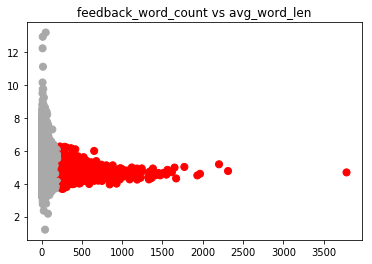

In [59]:
#plt.subplot(1,1,2)
plt.scatter(x= X['feedback_word_count'], y = X['avg_word_len'], c = color_theme[cluster_kmeans.labels_], s=50)
plt.title('feedback_word_count vs avg_word_len')



Text(0.5,1,'sentiment_score vs post_month')

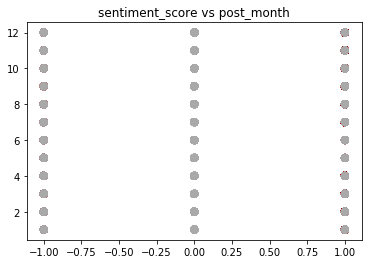

In [60]:
#plt.subplot(1,2,1)
plt.scatter(x= X['sentiment_score'], y = X['post_month'], c = color_theme[cluster_kmeans.labels_], s=50)
plt.title('sentiment_score vs post_month')



Text(0.5,1,'sentiment_score vs post day')

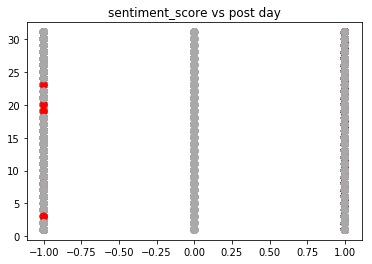

In [61]:
#plt.subplot(1,2,2)
plt.scatter(x= X['sentiment_score'], y = X['post_day'], c = color_theme[cluster_kmeans.labels_], s=50)
plt.title('sentiment_score vs post day')


Text(0.5,1,'sentiment_score vs job status')

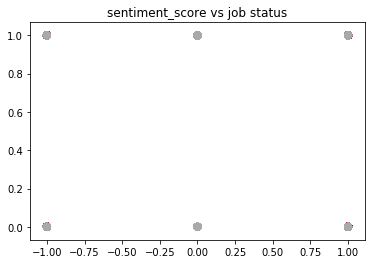

In [62]:
#plt.subplot(1,2,2)
plt.scatter(x= X['sentiment_score'], y = X['job_status'], c = color_theme[cluster_kmeans.labels_], s=50)
plt.title('sentiment_score vs job status')


Text(0.5,1,'job title vs location')

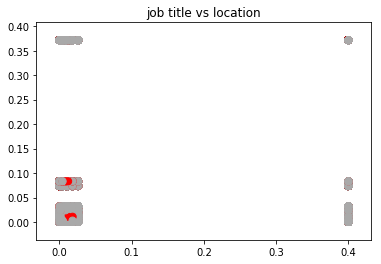

In [63]:
#plt.subplot(2,2,2)
plt.scatter(x= X['job_title_num'], y = X['location_num'], c = color_theme[cluster_kmeans.labels_], s=50)
plt.title('job title vs location')
